In [327]:
# 标准起手式
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.io as sio
import re
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from tpot import TPOTRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.pipeline import make_pipeline
from tpot.export_utils import set_param_recursive

In [221]:
# 读取summerOly_hosts
filename = '2025_Problem_C_Data\summerOly_hosts.csv'
hosts_data = pd.read_csv(filename)
hosts_data.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\GYP\AppData\Local\Temp\ipykernel_23192\3791881569.py:2: SyntaxWarning: invalid escape sequence '\s'
  filename = '2025_Problem_C_Data\summerOly_hosts.csv'


Year                       Host
0  1896             Athens, Greece
1  1900              Paris, France
2  1904   St. Louis, United States
3  1908     London, United Kingdom
4  1912          Stockholm, Sweden

In [222]:
# def remove_chars_before_first_uppercase
def remove_chars_before_first_uppercase(s):
    for i, char in enumerate(s):
        if char.isupper():
   
            return s[i:]
    return ""

In [223]:
# use remove_chars_before_first_uppercase
for i in range(len(hosts_data)):
    my_str=hosts_data.loc[i,"Host"]
    if "Cancelled" in my_str: 
        continue
    if "West" in my_str:
        my_str = "Germany"
    if "Soviet" in my_str:
        hosts_data.loc[i,"Host"]="RUS"
        continue
    if "South" in my_str:
        hosts_data.loc[i,"Host"]="KR"
        continue
    if "Japan" in my_str:
        my_str = "Japan"
    my_str = my_str[my_str.find(',')+1:]
    my_str = remove_chars_before_first_uppercase(my_str)
    country = pycountry.countries.get(name=my_str)
    hosts_data.loc[i,"Host"]= country.alpha_3
hosts_data.head()
# hosts_data[Year == 1928]
hosts_data[hosts_data["Year"] == 1928]

Year Host
0  1896  GRC
1  1900  FRA
2  1904  USA
3  1908  GBR
4  1912  SWE

Year Host
8  1928  NLD

In [224]:
#读取 summerOly_athletes
filename = '2025_Problem_C_Data\summerOly_athletes.csv'
athletes_data = pd.read_csv(filename)
athletes_data.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\GYP\AppData\Local\Temp\ipykernel_23192\3557452936.py:2: SyntaxWarning: invalid escape sequence '\s'
  filename = '2025_Problem_C_Data\summerOly_athletes.csv'


Name Sex            Team  NOC  Year         City  \
0              A Dijiang   M           China  CHN  1992    Barcelona   
1               A Lamusi   M           China  CHN  2012       London   
2            Gunnar Aaby   M         Denmark  DEN  1920    Antwerpen   
3            Edgar Aabye   M  Denmark/Sweden  DEN  1900        Paris   
4  Cornelia (-strannood)   F     Netherlands  NED  1932  Los Angeles   

        Sport                         Event     Medal  
0  Basketball   Basketball Men's Basketball  No medal  
1        Judo  Judo Men's Extra-Lightweight  No medal  
2    Football       Football Men's Football  No medal  
3  Tug-Of-War   Tug-Of-War Men's Tug-Of-War      Gold  
4   Athletics  Athletics Women's 100 metres  No medal

In [225]:
# 读取 summerOly_events
filename = '2025_Problem_C_Data\summerOly_medal_counts.csv'
counts_data = pd.read_csv(filename)
counts_data.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\GYP\AppData\Local\Temp\ipykernel_23192\3513262642.py:2: SyntaxWarning: invalid escape sequence '\s'
  filename = '2025_Problem_C_Data\summerOly_medal_counts.csv'


Rank            NOC  Gold  Silver  Bronze  Total  Year
0     1  United States    11       7       2     20  1896
1     2         Greece    10      18      19     47  1896
2     3        Germany     6       5       2     13  1896
3     4         France     5       4       2     11  1896
4     5  Great Britain     2       3       2      7  1896

In [226]:
# 归一化国家简称
for i in range(len(counts_data)):
    my_str=counts_data.loc[i,"NOC"]
    if "Cancelled" in my_str: 
        continue
    if "United Arab Emirates" in my_str:
        counts_data.loc[i,"NOC"]="UAE"
        continue
    if "West Germany" in my_str:
        counts_data.loc[i,"NOC"]="FRG"
        continue
    if "East Germany" in my_str:
        counts_data.loc[i,"NOC"]="GDR"
        continue
    if "Germany" in my_str or "German" in my_str :
        counts_data.loc[i,"NOC"]="GER"
        continue
    if "Soviet Union" in my_str:
        counts_data.loc[i,"NOC"]="URS"
        continue
    if  "Russian" in my_str or "Russia" in my_str:
        counts_data.loc[i,"NOC"]="RUS"
        continue
    if "Virgin Islands" in my_str:
        counts_data.loc[i,"NOC"]="VIN"
        continue
    if "Denmark" in my_str:
        counts_data.loc[i,"NOC"]="DEN"
        continue
    if "Zambia" in my_str:
        counts_data.loc[i,"NOC"]="ZAM"
        continue
    if "Zimbabwe" in my_str:
        counts_data.loc[i,"NOC"]="ZIM"
        continue
    if "Algeria" in my_str:
        counts_data.loc[i,"NOC"]="ALG"
        continue
    if "Antilles" in my_str:
        counts_data.loc[i,"NOC"]="ANT"
        continue
    if "North Korea" in my_str:
        counts_data.loc[i,"NOC"]="PRK"
        continue
    if "Korea" in my_str:
        counts_data.loc[i,"NOC"]="KOR"
        continue
    if "Japan" in my_str:
        my_str = "Japan"
    if "Great" in my_str or "British" in my_str :
        counts_data.loc[i,"NOC"]="GBR"
        continue
    if "Mixed team" in my_str:
        counts_data.loc[i,"NOC"]="MIX"
        continue
    if "Bohemia" in my_str:
        counts_data.loc[i,"NOC"]="BOH"
        continue
    if "Australasia" in my_str:
        counts_data.loc[i,"NOC"]="AUS"
        continue
    if "Czechoslovakia" in my_str:
        counts_data.loc[i,"NOC"]="CZE"
        continue
    if "Yugoslavia" in my_str:
        counts_data.loc[i,"NOC"]="YUG"
        continue
    if "Turkey" in my_str:
        counts_data.loc[i,"NOC"]="TUR"
        continue
    if "Ceylon" in my_str:
        counts_data.loc[i,"NOC"]="CEY"
        continue
    if "Iran" in my_str:
        counts_data.loc[i,"NOC"]="IRI"
        continue
    if "Venezuela" in my_str:
        counts_data.loc[i,"NOC"]="VEN"
        continue
    if "Formosa" in my_str or "Taiwan" in my_str or "Taipei" in my_str:
        counts_data.loc[i,"NOC"]="TPE"
        continue
    if "Tanzania" in my_str:
        counts_data.loc[i,"NOC"]="TAN"
        continue
    if "Ivory Coast" in my_str:
        counts_data.loc[i,"NOC"]="IVC"
        continue
    if "Syria" in my_str:
        counts_data.loc[i,"NOC"]="SYR"
        continue
    if "Virgin" in my_str:
        counts_data.loc[i,"NOC"]="USA"
        continue
    if "Unified" in my_str:
        counts_data.loc[i,"NOC"]="EUN"
        continue
    if "Independent Olympic" in my_str:
        counts_data.loc[i,"NOC"]="IOA"
        continue
    if "Czech" in my_str:
        counts_data.loc[i,"NOC"]="CZE"
        continue
    if "Moldova" in my_str:
        counts_data.loc[i,"NOC"]="MDA"
        continue
    if "Vietnam" in my_str:
        counts_data.loc[i,"NOC"]="VIE"
        continue
    if "Macedonia" in my_str:
        counts_data.loc[i,"NOC"]="MKD"
        continue
    if "Serbia and Montenegro" in my_str:
        counts_data.loc[i,"NOC"]="SCG"
        continue
    if "Fiji" in my_str:
        counts_data.loc[i,"NOC"]="FIJ"
        continue
    if "Kosovo" in my_str:
        counts_data.loc[i,"NOC"]="KOS"
        continue
    if "ROC" in my_str:
        counts_data.loc[i,"NOC"]="ROC"
        continue
    if "Refugee Olympic" in my_str:
        counts_data.loc[i,"NOC"]="ROT"
        continue
    if "Bahamas" in my_str:
        counts_data.loc[i,"NOC"]="BAH"
        continue
    if "Barbados" in my_str:
        counts_data.loc[i,"NOC"]="BAR"
        continue
    if "Bermuda" in my_str:
        counts_data.loc[i,"NOC"]="BER"
        continue
    if "Botswana" in my_str:
        counts_data.loc[i,"NOC"]="BOT"
        continue
    if "Bulgaria" in my_str:
        counts_data.loc[i,"NOC"]="BUL"
        continue
    if "Burkina" in my_str:
        counts_data.loc[i,"NOC"]="BUK"
        continue
    if "Chile" in my_str:
        counts_data.loc[i,"NOC"]="CHI"
        continue
    if "Costa Rica" in my_str:
        counts_data.loc[i,"NOC"]="CRC"
        continue
    if "Croatia" in my_str:
        counts_data.loc[i,"NOC"]="CRO"
        continue
    if "Greece" in my_str:
        counts_data.loc[i,"NOC"]="GRE"
        continue
    if "Grenada" in my_str:
        counts_data.loc[i,"NOC"]="GRN"
        continue
    if "Guatemala" in my_str:
        counts_data.loc[i,"NOC"]="GUA"
        continue
    if "Haiti" in my_str:
        counts_data.loc[i,"NOC"]="HAI"
        continue
    if "Indonesia" in my_str:
        counts_data.loc[i,"NOC"]="INA"
        continue
    if "Kuwait" in my_str:
        counts_data.loc[i,"NOC"]="KUW"
        continue
    if "Latvia" in my_str:
        counts_data.loc[i,"NOC"]="LAT"
        continue
    if "Malaysia" in my_str:
        counts_data.loc[i,"NOC"]="MAL"
        continue
    if "Mongolia" in my_str:
        counts_data.loc[i,"NOC"]="MGL"
        continue
    if "Mauritius" in my_str:
        counts_data.loc[i,"NOC"]="MRI"
        continue
    if "Netherlands" in my_str:
        counts_data.loc[i,"NOC"]="NED"
        continue
    if "Paraguay" in my_str:
        counts_data.loc[i,"NOC"]="PAR"
        continue
    if "Philippines" in my_str:
        counts_data.loc[i,"NOC"]="PHI"
        continue
    if "Portugal" in my_str:
        counts_data.loc[i,"NOC"]="POR"
        continue
    if "Slovenia" in my_str:
        counts_data.loc[i,"NOC"]="SLO"
        continue
    if "Sri Lanka" in my_str:
        counts_data.loc[i,"NOC"]="SRI"
        continue
    if "Sudan" in my_str:
        counts_data.loc[i,"NOC"]="SUD"
        continue
    if "Switzerland" in my_str:
        counts_data.loc[i,"NOC"]="SUI"
        continue
    if "Togo" in my_str:
        counts_data.loc[i,"NOC"]="TOG"
        continue
    if "Uruguay" in my_str:
        counts_data.loc[i,"NOC"]="URU"
        continue
    if "Vietnam" in my_str:
        counts_data.loc[i,"NOC"]="VNM"
        continue
    my_str = remove_chars_before_first_uppercase(my_str)
    my_str=my_str.strip()
    country = pycountry.countries.get(name=my_str)
    counts_data.loc[i,"NOC"]= country.alpha_3
counts_data.head()

Rank  NOC  Gold  Silver  Bronze  Total  Year
0     1  USA    11       7       2     20  1896
1     2  GRE    10      18      19     47  1896
2     3  GER     6       5       2     13  1896
3     4  FRA     5       4       2     11  1896
4     5  GBR     2       3       2      7  1896

In [227]:
# 读取 summerOly_medals
filename = '2025_Problem_C_Data\summerOly_programs.csv'
programs_data = pd.read_csv(filename,encoding = "iso8859_15")
programs_data = programs_data.fillna(0)
programs_data.head(71)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\GYP\AppData\Local\Temp\ipykernel_23192\1498479460.py:2: SyntaxWarning: invalid escape sequence '\s'
  filename = '2025_Problem_C_Data\summerOly_programs.csv'


Sport         Discipline Code Sports Governing Body 1896 1900  \
0        Aquatics  Artistic Swimming  SWA        World Aquatics    0    0   
1        Aquatics             Diving  DIV        World Aquatics    0    0   
2        Aquatics  Marathon Swimming  OWS        World Aquatics    0    0   
3        Aquatics           Swimming  SWM        World Aquatics    4    7   
4        Aquatics         Water Polo  WPO        World Aquatics    0    1   
..            ...                ...  ...                   ...  ...  ...   
66  Weightlifting      Weightlifting  WLF                   IWF    2    2   
67      Wrestling          Freestyle  WRF                   UWW    0    0   
68      Wrestling        Greco-Roman  WRG                   UWW    1    0   
69        Skating             Figure  FSK                   ISU    0    0   
70     Ice Hockey         Ice Hockey  IHO                  IIHF    0    0   

   1904  1906*  1908 1912  ...  1988 1992  1996  2000  2004  2008  2012  2016  \
0     0      0     0    0  ...     2    2   1.0   2.0   2.0   2.0   2.0   2.0   
1     2      1     2    4  ...     4    4   4.0   8.0   8.0   8.0   8.0   8.0   
2     0      0     0    0  ...     0    0   0.0   0.0   0.0   2.0   2.0   2.0   
3     9      4     6    9  ...    31   31  32.0  32.0  32.0  32.0  32.0  32.0   
4     1      0     1    1  ...     1    1   1.0   2.0   2.0   2.0   2.0   2.0   
..  ...    ...   ...  ...  ...   ...  ...   ...   ...   ...   ...   ...   ...   
66    2      0     0    0  ...    10   10  10.0  15.0  15.0  15.0  15.0  15.0   
67    7      0     5    0  ...    10   10  10.0   8.0  11.0  11.0  11.0  12.0   
68    0      4     4    5  ...    10   10  10.0   8.0   7.0   7.0   7.0   6.0   
69    0      0     4    0  ...     0    0   0.0   0.0   0.0   0.0   0.0   0.0   
70    0      0     0    0  ...     0    0   0.0   0.0   0.0   0.0   0.0   0.0   

    2020  2024  
0    2.0   2.0  
1    8.0   8.0  
2    2.0   2.0  
3   35.0  35.0  
4    2.0   2.0  
..   ...   ...  
66  14.0  10.0  
67  12.0  12.0  
68   6.0   6.0  
69   0.0   0.0  
70   0.0   0.0  

[71 rows x 35 columns]

In [228]:
ori_data = pd.read_csv('2025_Problem_C_Data/SportEventsSum.csv')
host_mp = pd.read_csv('2025_Problem_C_Data/hosts_mp.csv')
NOC2id = pd.read_csv('2025_Problem_C_Data/NOC2id.csv')
id2NOC = pd.read_csv('2025_Problem_C_Data/id2NOC.csv')
Sport2id = pd.read_csv('2025_Problem_C_Data/Sport2id.csv')
id2Sport = pd.read_csv('2025_Problem_C_Data/id2Sport.csv')
ori_data.set_index('Sport', inplace=True)
ori_data

1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aquatics                  4     8    12     5     9    14    16    17    16   
Archery                   0     7     6     0     3     0    10     0     0   
Athletics                12    23    25    21    26    30    29    27    27   
Badminton                 0     0     0     0     0     0     0     0     0   
Baseball and Softball     0     0     0     0     0     0     0     0     0   
Basketball                0     0     0     0     0     0     0     0     0   
Basque Pelota             0     1     0     0     0     0     0     0     0   
Boxing                    0     0     7     0     5     0     8     8     8   
Breaking                  0     0     0     0     0     0     0     0     0   
Canoeing                  0     0     0     0     0     0     0     0     0   
Cricket                   0     1     0     0     0     0     0     0     0   
Croquet                   0     3     0     0     0     0     0     0     0   
Cycling                   6     3     7     6     7     2     6     6     6   
Equestrian                0     5     0     0     0     5     7     5     6   
Fencing                   3     7     5     8     4     5     6     7     7   
Field hockey              0     0     0     0     1     0     1     0     1   
Flag football             0     0     0     0     0     0     0     0     0   
Football                  0     1     1     1     1     1     1     1     1   
Golf                      0     2     2     0     0     0     0     0     0   
Gymnastics                8     1    11     4     2     4     4     9     8   
Handball                  0     0     0     0     0     0     0     0     0   
Ice Hockey                0     0     0     0     0     0     1     0     0   
Jeu de Paume              0     0     0     0     1     0     0     0     0   
Judo                      0     0     0     0     0     0     0     0     0   
Karate                    0     0     0     0     0     0     0     0     0   
Lacrosse                  0     0     1     0     1     0     0     0     0   
Modern Pentathlon         0     0     0     0     0     1     1     1     1   
Polo                      0     1     0     0     1     0     1     1     0   
Rackets                   0     0     0     0     2     0     0     0     0   
Roque                     0     0     1     0     0     0     0     0     0   
Rowing                    0     5     5     6     4     4     5     7     7   
Rugby                     0     1     0     0     1     0     1     1     0   
Sailing                   0    13     0     0     4     4    14     3     3   
Shooting                  5     8     0    16    15    18    21    10     0   
Skateboarding             0     0     0     0     0     0     0     0     0   
Skating                   0     0     0     0     4     0     3     0     0   
Sport Climbing            0     0     0     0     0     0     0     0     0   
Squash                    0     0     0     0     0     0     0     0     0   
Surfing                   0     0     0     0     0     0     0     0     0   
Table Tennis              0     0     0     0     0     0     0     0     0   
Taekwondo                 0     0     0     0     0     0     0     0     0   
Tennis                    2     4     2     4     6     8     5     5     0   
Triathlon                 0     0     0     0     0     0     0     0     0   
Tug of War                0     1     1     1     1     1     1     0     0   
Volleyball                0     0     0     0     0     0     0     0     0   
Water Motorsports         0     0     0     0     3     0     0     0     0   
Weightlifting             2     2     2     0     0     0     5     5     5   
Wrestling                 1     0     7     4     9     5    10    13    13   

                       1932  ...  1988  1992  1996  2000  2004  2008  20

In [229]:
def compute_variance_and_topM(map_dict,M:int):
    # 计算方差

    #drop nan
    map_dict = {k: v for k, v in map_dict.items() if np.isnan(v) == False}
    # print(map_dict)
    values = list(map_dict.values())
    n = len(values)
    if n == 0:
        raise ValueError("输入字典不能为空")
    mean = 0
    aviln = 0
    for value in values:
        if not isinstance(value, (int, float)):
            continue
        mean += value
        aviln += 1
    
    if aviln == 0:
        raise ValueError("输入字典中值的类型不正确")
    
    mean /= aviln
    # print(mean)
    variance = 0
    for value in values:
        if not isinstance(value, (int, float)):
            continue
        variance += (value - mean) ** 2
    variance /= aviln
    
    
    # print(variance)
    # # 按值降序排序字典项，并取前两个
    sorted_items = sorted(map_dict.items(), key=lambda item: item[1], reverse=True)
    topM = sorted_items[:M]
    
    # 提取前两个值及其对应的键
    topM_result = [(value, key) for key, value in topM]
    
    return variance, topM_result

In [230]:
counts_data
Years = counts_data["Year"].unique()
Years
for i in Years:
    print(i)

Rank  NOC  Gold  Silver  Bronze  Total  Year
0        1  USA    11       7       2     20  1896
1        2  GRE    10      18      19     47  1896
2        3  GER     6       5       2     13  1896
3        4  FRA     5       4       2     11  1896
4        5  GBR     2       3       2      7  1896
...    ...  ...   ...     ...     ...    ...   ...
1430    84  QAT     0       0       1      1  2024
1431    84  ROT     0       0       1      1  2024
1432    84  SGP     0       0       1      1  2024
1433    84  SVK     0       0       1      1  2024
1434    84  ZAM     0       0       1      1  2024

[1435 rows x 7 columns]

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012, 2016, 2020, 2024])

1896
1900
1904
1908
1912
1920
1924
1928
1932
1936
1948
1952
1956
1960
1964
1968
1972
1976
1980
1984
1988
1992
1996
2000
2004
2008
2012
2016
2020
2024


In [231]:
# 计算以 国家 和 年份 为索引的金牌数
GoldMedals_mp = {}
for Rank,NOC,Gold,Silver,Bronze,Total,years in counts_data.values:
    if NOC not in GoldMedals_mp:
        GoldMedals_mp[NOC] = {}
        for i in Years:
            # print(i)
            GoldMedals_mp[NOC][i] = 0
    # if Years not in GoldMedals_mp[NOC]:
        # GoldMedals_mp[NOC][Years] = 0
    GoldMedals_mp[NOC][years] += Gold
GoldMedals_df = pd.DataFrame(GoldMedals_mp)
GoldMedals_df

USA  GRE  GER  FRA  GBR  HUN  AUT  AUS  DEN  SUI  ...  KOS  ROC  SMR  \
1896   11   10    6    5    2    2    2    2    1    1  ...    0    0    0   
1900   19    0    4   27   15    1    0    2    1    6  ...    0    0    0   
1904   76    1    4    0    1    2    1    0    0    1  ...    0    0    0   
1908   23    0    3    5   56    3    0    1    0    0  ...    0    0    0   
1912   26    1    5    7   10    3    0    2    1    0  ...    0    0    0   
1920   41    0    0    9   14    0    0    0    3    2  ...    0    0    0   
1924   45    0    0   13    9    2    0    3    2    7  ...    0    0    0   
1928   22    0   10    6    3    4    2    1    3    7  ...    0    0    0   
1932   44    0    5   11    5    6    1    3    0    0  ...    0    0    0   
1936   24    0   38    7    4   10    5    0    0    4  ...    0    0    0   
1948   38    0    0   10    3   10    1    2    5    5  ...    0    0    0   
1952   40    0    0    6    1   16    0    6    2    2  ...    0    0    0   
1956   32    0    6    4    6    9    0   13    1    0  ...    0    0    0   
1960   34    1   12    0    2    6    1    8    2    0  ...    0    0    0   
1964   36    0   10    1    4   10    0    6    2    1  ...    0    0    0   
1968   45    0    0    7    5   10    0    5    1    0  ...    0    0    0   
1972   33    0    0    2    4    6    0    8    1    0  ...    0    0    0   
1976   34    0    0    2    3    4    0    0    1    1  ...    0    0    0   
1980    0    1    0    6    5    7    1    2    2    2  ...    0    0    0   
1984   83    0    0    5    5    0    1    4    0    0  ...    0    0    0   
1988   36    0    0    6    5   11    1    3    2    0  ...    0    0    0   
1992   37    2   33    8    5   11    0    7    1    1  ...    0    0    0   
1996   44    4   20   15    1    7    0    9    4    4  ...    0    0    0   
2000   37    4   13   13   11    8    2   16    2    1  ...    0    0    0   
2004   36    6   13   11    9    8    2   17    2    1  ...    0    0    0   
2008   36    0   16    7   19    3    0   14    2    2  ...    0    0    0   
2012   48    0   11   11   29    8    0    8    2    2  ...    0    0    0   
2016   46    3   17   10   27    8    0    8    2    3  ...    1    0    0   
2020   39    2   10   10   22    6    1   17    3    3  ...    2   20    0   
2024   40    1   12   16   14    6    2   18    2    1  ...    0    0    0   

      TKM  BUK  LCA  DMA  ALB  CPV  ROT  
1896    0    0    0    0    0    0    0  
1900    0    0    0    0    0    0    0  
1904    0    0    0    0    0    0    0  
1908    0    0    0    0    0    0    0  
1912    0    0    0    0    0    0    0  
1920    0    0    0    0    0    0    0  
1924    0    0    0    0    0    0    0  
1928    0    0    0    0    0    0    0  
1932    0    0    0    0    0    0    0  
1936    0    0    0    0    0    0    0  
1948    0    0    0    0    0    0    0  
1952    0    0    0    0    0    0    0  
1956    0    0    0    0    0    0    0  
1960    0    0    0    0    0    0    0  
1964    0    0    0    0    0    0    0  
1968    0    0    0    0    0    0    0  
1972    0    0    0    0    0    0    0  
1976    0    0    0    0    0    0    0  
1980    0    0    0    0    0    0    0  
1984    0    0    0    0    0    0    0  
1988    0    0    0    0    0    0    0  
1992    0    0    0    0    0    0    0  
1996    0    0    0    0    0    0    0  
2000    0    0    0    0    0    0    0  
2004    0    0    0    0    0    0    0  
2008    0    0    0    0    0    0    0  
2012    0    0    0    0    0    0    0  
2016    0    0    0    0    0    0    0  
2020    0    0    0    0    0    0    0  
2024    0    0    1    1    0    0    0  

[30 rows x 154 columns]

以 \[NOC\]\[Year\] 为数据索引，逐个生成：
包含：
+ 前n届的奖牌总数
+ n届平均项目统治力前m高的项目，其统治力各为多少
+ 这m个项目在本年有多少奖牌
+ 偏科程度
+ 是否是主办方

奖牌数据由 国家 年份 索引

In [232]:
# 计算map_NOCandSPE_to_YEARandMEDAL
map_NOCandSPE_to_YEARandMEDAL = {}

for name,Sex,Team,NOC,Year,City,Sport,Event,Medal in athletes_data.values:
    SPE = Sport
    if map_NOCandSPE_to_YEARandMEDAL.get(NOC) == None:
        map_NOCandSPE_to_YEARandMEDAL[NOC] = {}
    if map_NOCandSPE_to_YEARandMEDAL[NOC].get(SPE) == None:
        map_NOCandSPE_to_YEARandMEDAL[NOC][SPE] = {}
    if map_NOCandSPE_to_YEARandMEDAL[NOC][SPE].get(Year) == None:
        map_NOCandSPE_to_YEARandMEDAL[NOC][SPE][Year] = {"Gold":0,"Silver":0,"Bronze":0,"No medal":0}
    map_NOCandSPE_to_YEARandMEDAL[NOC][SPE][Year][Medal] += 1

for key,value in map_NOCandSPE_to_YEARandMEDAL.items():
    for key2,value2 in value.items():
        sorted_year = sorted(value2.keys())
        map_NOCandSPE_to_YEARandMEDAL[key][key2] = dict(sorted(value2.items(), key=lambda x:x[0]))

In [233]:
# 预处理 programs_data
Years_str = [str(i) for i in Years]

programs_data[Years_str] = programs_data[Years_str].apply(
    pd.to_numeric, errors="coerce", downcast="integer"
).astype("Int64")  # 使用 Int64 允许 NaN
# programs_data
SportEventsSum = programs_data.groupby("Sport").sum()
SportEventsSum = SportEventsSum.rename(columns={'1906*': '1906'})
SportEventsSum.drop(["Total disciplines","Total events","Total sports"],inplace=True)
SportEventsSum.drop(columns=["Discipline","Code","Sports Governing Body"],inplace=True)
SportEventsSum.to_csv("2025_Problem_C_Data/SportEventsSum.csv")
SportEventsSum.columns.unique()

Index(['1896', '1900', '1904', '1906', '1908', '1912', '1920', '1924', '1928',
       '1932', '1936', '1948', '1952', '1956', '1960', '1964', '1968', '1972',
       '1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008',
       '2012', '2016', '2020', '2024'],
      dtype='object')

将 $ \frac{\text{某国获得的奖牌数}}{\text{总奖牌数}} $ 定义为该国在该项目该年的“优势程度”

优势程度字典由 国家 和 年份 索引一个代表优势项目的字符串

In [234]:
# 预处理 NOCs Years Sports 列表
NOCs = counts_data["NOC"].unique()
Years = SportEventsSum.columns.unique()
Sports = SportEventsSum.index.unique()
# Years = Years[1:]
Sports
hosts_mp = {}
for year,hosts in hosts_data.values:
    hosts_mp[year] = hosts
Years

Index(['Aquatics', 'Archery', 'Athletics', 'Badminton',
       'Baseball and Softball', 'Basketball', 'Basque Pelota', 'Boxing',
       'Breaking', 'Canoeing', 'Cricket', 'Croquet', 'Cycling', 'Equestrian',
       'Fencing', 'Field hockey', 'Flag football', 'Football', 'Golf',
       'Gymnastics', 'Handball', 'Ice Hockey', 'Jeu de Paume', 'Judo',
       'Karate', 'Lacrosse', 'Modern Pentathlon', 'Polo', 'Rackets', 'Roque',
       'Rowing', 'Rugby', 'Sailing', 'Shooting', 'Skateboarding', 'Skating',
       'Sport Climbing', 'Squash', 'Surfing', 'Table Tennis', 'Taekwondo',
       'Tennis', 'Triathlon', 'Tug of War', 'Volleyball', 'Water Motorsports',
       'Weightlifting', 'Wrestling'],
      dtype='object', name='Sport')

Index(['1896', '1900', '1904', '1906', '1908', '1912', '1920', '1924', '1928',
       '1932', '1936', '1948', '1952', '1956', '1960', '1964', '1968', '1972',
       '1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008',
       '2012', '2016', '2020', '2024'],
      dtype='object')

In [273]:
def cacuData(MedalType:str,N:int,M:int):
    AdvantageperNOC_mp = {}

    # 计算以 国家 和 年份 为索引的金牌数
    GoldMedals_mp = {}
    for Rank,NOC,Gold,Silver,Bronze,Total,years in counts_data.values:
        if NOC not in GoldMedals_mp:
            GoldMedals_mp[NOC] = {}
            for i in Years:
                # print(i)
                GoldMedals_mp[NOC][int(i)] = 0
        # if Years not in GoldMedals_mp[NOC]:
        #     GoldMedals_mp[NOC][Years] = 0
        print(years,GoldMedals_mp[NOC])
        if MedalType == "Gold":
            GoldMedals_mp[NOC][years] += Gold
        elif MedalType == "Silver":
            GoldMedals_mp[NOC][years] += Silver
        elif MedalType == "Bronze":
            GoldMedals_mp[NOC][years] += Bronze
        elif MedalType == "Total":
            GoldMedals_mp[NOC][years] += Total
    GoldMedals_df = pd.DataFrame(GoldMedals_mp)
    # GoldMedals_df

    for iNOC in NOCs:
        AdvantageperNOC_mp[iNOC] = {}
        for iYear in Years:
            AdvantageperNOC_mp[iNOC][iYear] = 0
            subAdv = {}
            for iSport in Sports:
                totalMedals = SportEventsSum[iYear][iSport]
                if map_NOCandSPE_to_YEARandMEDAL.get(iNOC) == None:
                    ourMedals = 0
                else:
                    # ourMedals = df_NOCandSPE_to_YEARandMEDAL[iNOC][iSport][iYear]["Total"]
                    if map_NOCandSPE_to_YEARandMEDAL[iNOC].get(iSport) == None :
                        ourMedals = 0
                    else:
                        # print([iNOC,iYear,iSport],map_NOCandSPE_to_YEARandMEDAL[iNOC][iSport])
                        if map_NOCandSPE_to_YEARandMEDAL[iNOC][iSport].get(int(iYear)) == None:
                            ourMedals = 0
                        else:
                            ourMedals = map_NOCandSPE_to_YEARandMEDAL[iNOC][iSport][int(iYear)][MedalType]
                subAdv[iSport] = ourMedals/totalMedals
            # maxAdvSport = max(subAdv, key=subAdv.get)
            AdvantageperNOC_mp[iNOC][iYear] = subAdv
            # print(iNOC,iYear,subAdv)
    pamars = ['if host','Y','V']
    for i in range(1,N+1):
        pamars.append('Year-'+str(i) + '-Medals')
        for j in range(1,M+1):
            pamars.append('Year-'+str(i) + '-TMASMN-'+str(j))
    for j in range(1,M+1):
        pamars.append('CUR-'+str(j))
    pamars
    TOTAL_DATA = {}
    for iNOC in NOCs:
        for iYear in Years[(N+2):]:
                if int(iYear) in [1916 + i * 4 for i in range(1,N+1)]:
                    continue
                if int(iYear) in [1944 + i * 4 for i in range(1,N+1)]:
                    continue
                TOTAL_DATA[(iNOC,iYear)] = {}
                
                print(iNOC,iYear)

                advList = AdvantageperNOC_mp[iNOC][iYear]

                TOTAL_DATA[(iNOC,iYear)]['Y'] = GoldMedals_df[iNOC][int(iYear)]
                tv,topM = compute_variance_and_topM(advList,M)
                # TOTAL_DATA[(iNOC,iYear)]['V'] = tv
                tvls = []
                bestM,bestSP = topM[0]
                for (kv,sport) in topM:
                    if kv > bestM:
                        bestM = kv
                        bestSP = sport
                
                for i in range(1,M+1):
                    TOTAL_DATA[(iNOC,iYear)]['CUR-'+str(i)] = ori_data[str(int(iYear))][bestSP]

                for i in range(1,N+1):
                    advList = AdvantageperNOC_mp[iNOC][str(int(iYear)-i*4)]
                    tv,topM = compute_variance_and_topM(advList,M)
                    cm = 1
                    TOTAL_DATA[(iNOC,iYear)]['Year-'+str(i) + '-Medals'] = GoldMedals_df[iNOC][int(iYear)-i*4]
                            
                    for (kv,sport) in topM:
                            TOTAL_DATA[(iNOC,iYear)]['Year-'+str(i) + '-TMASMN-'+str(cm)] = ori_data[str(int(iYear)-i*4)][sport] * kv
                            
                            # TOTAL_DATA[(iNOC,iYear)]['Year-'+str(i) + '-TMASR-'+str(cm)] = kv
                            cm += 1
                    tvls.append(tv)
                TOTAL_DATA[(iNOC,iYear)]['V'] = np.mean(tvls)

                if hosts_mp[int(iYear)] == iNOC:
                    TOTAL_DATA[(iNOC,iYear)]['if host'] = 1
                else:
                    TOTAL_DATA[(iNOC,iYear)]['if host'] = 0
    TOTAL_DATA = pd.DataFrame(TOTAL_DATA).T
    return TOTAL_DATA

In [274]:
def cacuData_dropY(MedalType:str,N:int,M:int):
    AdvantageperNOC_mp = {}
    # 计算以 国家 和 年份 为索引的金牌数
    GoldMedals_mp = {}
    for Rank,NOC,Gold,Silver,Bronze,Total,years in counts_data.values:
        if NOC not in GoldMedals_mp:
            GoldMedals_mp[NOC] = {}
            for i in Years:
                # print(i)
                GoldMedals_mp[NOC][int(i)] = 0
        # if Years not in GoldMedals_mp[NOC]:
        #     GoldMedals_mp[NOC][Years] = 0
        print(years,GoldMedals_mp[NOC])
        if MedalType == "Gold":
            GoldMedals_mp[NOC][years] += Gold
        elif MedalType == "Silver":
            GoldMedals_mp[NOC][years] += Silver
        elif MedalType == "Bronze":
            GoldMedals_mp[NOC][years] += Bronze
        elif MedalType == "Total":
            GoldMedals_mp[NOC][years] += Total
    GoldMedals_df = pd.DataFrame(GoldMedals_mp)
    # GoldMedals_df


    for iNOC in NOCs:
        AdvantageperNOC_mp[iNOC] = {}
        for iYear in Years:
            AdvantageperNOC_mp[iNOC][iYear] = 0
            subAdv = {}
            for iSport in Sports:
                totalMedals = SportEventsSum[iYear][iSport]
                if map_NOCandSPE_to_YEARandMEDAL.get(iNOC) == None:
                    ourMedals = 0
                else:
                    # ourMedals = df_NOCandSPE_to_YEARandMEDAL[iNOC][iSport][iYear]["Total"]
                    if map_NOCandSPE_to_YEARandMEDAL[iNOC].get(iSport) == None :
                        ourMedals = 0
                    else:
                        # print([iNOC,iYear,iSport],map_NOCandSPE_to_YEARandMEDAL[iNOC][iSport])
                        if map_NOCandSPE_to_YEARandMEDAL[iNOC][iSport].get(int(iYear)) == None:
                            ourMedals = 0
                        else:
                            ourMedals = map_NOCandSPE_to_YEARandMEDAL[iNOC][iSport][int(iYear)][MedalType]
                subAdv[iSport] = ourMedals/totalMedals
            # maxAdvSport = max(subAdv, key=subAdv.get)
            AdvantageperNOC_mp[iNOC][iYear] = subAdv
            # print(iNOC,iYear,subAdv)
    pamars = ['if host','Y','V']
    for i in range(1,N+1):
        pamars.append('Year-'+str(i) + '-Medals')
        for j in range(1,M+1):
            pamars.append('Year-'+str(i) + '-TMASMN-'+str(j))
    for j in range(1,M+1):
        pamars.append('CUR-'+str(j))
            # pamars.append('Year-'+str(i) + '-TMASR-'+str(j))
    pamars
    TOTAL_DATA = {}
    for iNOC in NOCs:
        for iYear in ['2028']:
                if int(iYear) in [1916 + i * 4 for i in range(1,N+1)]:
                    continue
                if int(iYear) in [1944 + i * 4 for i in range(1,N+1)]:
                    continue
                TOTAL_DATA[(iNOC,iYear)] = {}
                
                print(iNOC,iYear)

                # advList = AdvantageperNOC_mp[iNOC][iYear]

                # TOTAL_DATA[(iNOC,iYear)]['Y'] = GoldMedals_df[iNOC][int(iYear)]
                # tv,topM = compute_variance_and_topM(advList,M)
                # TOTAL_DATA[(iNOC,iYear)]['V'] = tv
                tvls = []
                bestM,bestSP = topM[0]
                for (kv,sport) in topM:
                    if kv > bestM:
                        bestM = kv
                        bestSP = sport
                
                for i in range(1,M+1):
                    TOTAL_DATA[(iNOC,iYear)]['CUR-'+str(i)] = ori_data[str(int(iYear))][bestSP]
                tvls = []
                for i in range(1,N+1):
                    advList = AdvantageperNOC_mp[iNOC][str(int(iYear)-i*4)]
                    tv,topM = compute_variance_and_topM(advList,M)
                    cm = 1
                    TOTAL_DATA[(iNOC,iYear)]['Year-'+str(i) + '-Medals'] = GoldMedals_df[iNOC][int(iYear)-i*4]
                    tvls.append(tv)
                    for (kv,sport) in topM:
                            TOTAL_DATA[(iNOC,iYear)]['Year-'+str(i) + '-TMASMN-'+str(cm)] = ori_data[str(int(iYear)-i*4)][sport] * kv
                            
                            # TOTAL_DATA[(iNOC,iYear)]['Year-'+str(i) + '-TMASR-'+str(cm)] = kv
                            cm += 1
                TOTAL_DATA[(iNOC,iYear)]['V'] = np.mean(tvls)
                if hosts_mp[int(iYear)] == iNOC:
                    TOTAL_DATA[(iNOC,iYear)]['if host'] = 1
                else:
                    TOTAL_DATA[(iNOC,iYear)]['if host'] = 0
    TOTAL_DATA = pd.DataFrame(TOTAL_DATA)
    return TOTAL_DATA.T

In [237]:
# 计算 AdvantageperNOC_mp

# map_NOCandSPE_to_YEARandMEDAL['CHN']['Gymnastics'][1984]['Gold']

AdvantageperNOC_mp = {}
for iNOC in NOCs:
    AdvantageperNOC_mp[iNOC] = {}
    for iYear in Years:
        AdvantageperNOC_mp[iNOC][iYear] = 0
        subAdv = {}
        for iSport in Sports:
            totalMedals = SportEventsSum[iYear][iSport]
            if map_NOCandSPE_to_YEARandMEDAL.get(iNOC) == None:
                ourMedals = 0
            else:
                # ourMedals = df_NOCandSPE_to_YEARandMEDAL[iNOC][iSport][iYear]["Total"]
                if map_NOCandSPE_to_YEARandMEDAL[iNOC].get(iSport) == None :
                    ourMedals = 0
                else:
                    # print([iNOC,iYear,iSport],map_NOCandSPE_to_YEARandMEDAL[iNOC][iSport])
                    if map_NOCandSPE_to_YEARandMEDAL[iNOC][iSport].get(int(iYear)) == None:
                        ourMedals = 0
                    else:
                        ourMedals = map_NOCandSPE_to_YEARandMEDAL[iNOC][iSport][int(iYear)]["Gold"]
            subAdv[iSport] = ourMedals/totalMedals
        # maxAdvSport = max(subAdv, key=subAdv.get)
        AdvantageperNOC_mp[iNOC][iYear] = subAdv
        print(iNOC,iYear,subAdv)


C:\Users\GYP\AppData\Local\Temp\ipykernel_23192\3912164643.py:25: RuntimeWarning: invalid value encountered in scalar divide
  subAdv[iSport] = ourMedals/totalMedals
C:\Users\GYP\AppData\Local\Temp\ipykernel_23192\3912164643.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  subAdv[iSport] = ourMedals/totalMedals


USA 1896 {'Aquatics': np.float64(0.0), 'Archery': np.float64(nan), 'Athletics': np.float64(0.75), 'Badminton': np.float64(nan), 'Baseball\xa0and Softball': np.float64(nan), 'Basketball': np.float64(nan), 'Basque Pelota': np.float64(nan), 'Boxing': np.float64(nan), 'Breaking': np.float64(nan), 'Canoeing': np.float64(nan), 'Cricket': np.float64(nan), 'Croquet': np.float64(nan), 'Cycling': np.float64(0.0), 'Equestrian': np.float64(nan), 'Fencing': np.float64(0.0), 'Field hockey': np.float64(nan), 'Flag football': np.float64(nan), 'Football': np.float64(nan), 'Golf': np.float64(nan), 'Gymnastics': np.float64(0.0), 'Handball': np.float64(nan), 'Ice Hockey': np.float64(nan), 'Jeu de Paume': np.float64(nan), 'Judo': np.float64(nan), 'Karate': np.float64(nan), 'Lacrosse': np.float64(nan), 'Modern Pentathlon': np.float64(nan), 'Polo': np.float64(nan), 'Rackets': np.float64(nan), 'Roque': np.float64(nan), 'Rowing': np.float64(nan), 'Rugby': np.float64(nan), 'Sailing': np.float64(nan), 'Shooting'

In [238]:
np.mean([x for x in AdvantageperNOC_mp['USA']["1964"].values()])

np.float64(nan)

In [239]:
tv,topM = compute_variance_and_topM(AdvantageperNOC_mp['USA']["1964"],2)
for (k,v) in topM:
    print(k,v)
tv

12.0 Basketball
1.7142857142857142 Rowing


np.float64(7.157392520566246)

TOTAL_DATA字典由 国家 年份 联合索引

常数LENN为历史数据长度

Events number of Advantage Sport:ENAS

Top M Advantage Sport Medal Number : TMASMN

Top M Advantage Sport adv Ratio: TMASR

In [240]:
# LENN = 5
N = 4
M = 2

In [267]:
pamars = ['if host','Y','V']
for i in range(1,N+1):
    pamars.append('Year-'+str(i) + '-Medals')
    for j in range(1,M+1):
        pamars.append('Year-'+str(i) + '-TMASMN-'+str(j))
        # pamars.append('Year-'+str(i) + '-TMASR-'+str(j))
pamars

['if host',
 'Y',
 'V',
 'Year-1-Medals',
 'Year-1-TMASMN-1',
 'Year-2-Medals',
 'Year-2-TMASMN-1',
 'Year-3-Medals',
 'Year-3-TMASMN-1']

In [242]:
hosts_mp = {}
for year,hosts in hosts_data.values:
    hosts_mp[year] = hosts
hosts_mp

{1896: 'GRC',
 1900: 'FRA',
 1904: 'USA',
 1908: 'GBR',
 1912: 'SWE',
 1916: '\xa0Cancelled (WWI – Berlin had been awarded)',
 1920: 'BEL',
 1924: 'FRA',
 1928: 'NLD',
 1932: 'USA',
 1936: 'DEU',
 1940: '\xa0Cancelled\xa0(WWII – Tokyo had been awarded)',
 1944: '\xa0Cancelled\xa0(WWII – London had been awarded)',
 1948: 'GBR',
 1952: 'FIN',
 1956: 'AUS',
 1960: 'ITA',
 1964: 'JPN',
 1968: 'MEX',
 1972: 'DEU',
 1976: 'CAN',
 1980: 'RUS',
 1984: 'USA',
 1988: 'KR',
 1992: 'ESP',
 1996: 'USA',
 2000: 'AUS',
 2004: 'GRC',
 2008: 'CHN',
 2012: 'GBR',
 2016: 'BRA',
 2020: 'JPN',
 2024: 'FRA',
 2028: 'USA',
 2032: 'AUS'}

In [243]:
TOTAL_DATA = {}
for iNOC in NOCs:
      for iYear in Years[(N+2):]:
            if int(iYear) in [1916 + i * 4 for i in range(1,N+1)]:
                  continue
            if int(iYear) in [1944 + i * 4 for i in range(1,N+1)]:
                  continue
            TOTAL_DATA[(iNOC,iYear)] = {}
            
            print(iNOC,iYear)

            advList = AdvantageperNOC_mp[iNOC][iYear]

            TOTAL_DATA[(iNOC,iYear)]['Y'] = GoldMedals_df[iNOC][int(iYear)]
            tv,topM = compute_variance_and_topM(advList,M)
            TOTAL_DATA[(iNOC,iYear)]['V'] = tv

            for i in range(1,N+1):
                  advList = AdvantageperNOC_mp[iNOC][str(int(iYear)-i*4)]
                  tv,topM = compute_variance_and_topM(advList,M)
                  cm = 1
                  TOTAL_DATA[(iNOC,iYear)]['Year-'+str(i) + '-Medals'] = GoldMedals_df[iNOC][int(iYear)-i*4]
                        
                  for (kv,sport) in topM:
                        TOTAL_DATA[(iNOC,iYear)]['Year-'+str(i) + '-TMASMN-'+str(cm)] = ori_data[iYear][sport]
                        
                        TOTAL_DATA[(iNOC,iYear)]['Year-'+str(i) + '-TMASR-'+str(cm)] = kv
                        cm += 1

            if hosts_mp[int(iYear)] == iNOC:
                  TOTAL_DATA[(iNOC,iYear)]['if host'] = 1
            else:
                  TOTAL_DATA[(iNOC,iYear)]['if host'] = 0
TOTAL_DATA = pd.DataFrame(TOTAL_DATA)

USA 1936
USA 1964
USA 1968
USA 1972
USA 1976
USA 1980
USA 1984
USA 1988
USA 1992
USA 1996
USA 2000
USA 2004
USA 2008
USA 2012
USA 2016
USA 2020
USA 2024
GRE 1936
GRE 1964
GRE 1968
GRE 1972
GRE 1976
GRE 1980
GRE 1984
GRE 1988
GRE 1992
GRE 1996
GRE 2000
GRE 2004
GRE 2008
GRE 2012
GRE 2016
GRE 2020
GRE 2024
GER 1936
GER 1964
GER 1968
GER 1972
GER 1976
GER 1980
GER 1984
GER 1988
GER 1992
GER 1996
GER 2000
GER 2004
GER 2008
GER 2012
GER 2016
GER 2020
GER 2024
FRA 1936
FRA 1964
FRA 1968
FRA 1972
FRA 1976
FRA 1980
FRA 1984
FRA 1988
FRA 1992
FRA 1996
FRA 2000
FRA 2004
FRA 2008
FRA 2012
FRA 2016
FRA 2020
FRA 2024
GBR 1936
GBR 1964
GBR 1968
GBR 1972
GBR 1976
GBR 1980
GBR 1984
GBR 1988
GBR 1992
GBR 1996
GBR 2000
GBR 2004
GBR 2008
GBR 2012
GBR 2016
GBR 2020
GBR 2024
HUN 1936
HUN 1964
HUN 1968
HUN 1972
HUN 1976
HUN 1980
HUN 1984
HUN 1988
HUN 1992
HUN 1996
HUN 2000
HUN 2004
HUN 2008
HUN 2012
HUN 2016
HUN 2020
HUN 2024
AUT 1936
AUT 1964
AUT 1968
AUT 1972
AUT 1976
AUT 1980
AUT 1984
AUT 1988
AUT 1992
A

In [272]:
cacuData("Gold",N,M)

1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0, 2024: 0}
1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0, 2024: 0}
1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0, 2024: 0}
1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964

C:\Users\GYP\AppData\Local\Temp\ipykernel_23192\2396585966.py:45: RuntimeWarning: invalid value encountered in scalar divide
  subAdv[iSport] = ourMedals/totalMedals
C:\Users\GYP\AppData\Local\Temp\ipykernel_23192\2396585966.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  subAdv[iSport] = ourMedals/totalMedals


USA 1912
USA 1932
USA 1936
USA 1960
USA 1964
USA 1968
USA 1972
USA 1976
USA 1980
USA 1984
USA 1988
USA 1992
USA 1996
USA 2000
USA 2004
USA 2008
USA 2012
USA 2016
USA 2020
USA 2024
GRE 1912
GRE 1932
GRE 1936
GRE 1960
GRE 1964
GRE 1968
GRE 1972
GRE 1976
GRE 1980
GRE 1984
GRE 1988
GRE 1992
GRE 1996
GRE 2000
GRE 2004
GRE 2008
GRE 2012
GRE 2016
GRE 2020
GRE 2024
GER 1912
GER 1932
GER 1936
GER 1960
GER 1964
GER 1968
GER 1972
GER 1976
GER 1980
GER 1984
GER 1988
GER 1992
GER 1996
GER 2000
GER 2004
GER 2008
GER 2012
GER 2016
GER 2020
GER 2024
FRA 1912
FRA 1932
FRA 1936
FRA 1960
FRA 1964
FRA 1968
FRA 1972
FRA 1976
FRA 1980
FRA 1984
FRA 1988
FRA 1992
FRA 1996
FRA 2000
FRA 2004
FRA 2008
FRA 2012
FRA 2016
FRA 2020
FRA 2024
GBR 1912
GBR 1932
GBR 1936
GBR 1960
GBR 1964
GBR 1968
GBR 1972
GBR 1976
GBR 1980
GBR 1984
GBR 1988
GBR 1992
GBR 1996
GBR 2000
GBR 2004
GBR 2008
GBR 2012
GBR 2016
GBR 2020
GBR 2024
HUN 1912
HUN 1932
HUN 1936
HUN 1960
HUN 1964
HUN 1968
HUN 1972
HUN 1976
HUN 1980
HUN 1984
HUN 1988
H

Y  CUR-1  Year-1-Medals  Year-1-TMASMN-1  Year-2-Medals  \
USA 1912  26.0   18.0           23.0             11.0           76.0   
    1932  44.0    4.0           22.0             11.0           45.0   
    1936  24.0    1.0           44.0             14.0           22.0   
    1960  34.0    1.0           32.0             12.0           40.0   
    1964  36.0    1.0           34.0             12.0           32.0   
...        ...    ...            ...              ...            ...   
ROT 2008   0.0   46.0            0.0              0.0            0.0   
    2012   0.0   46.0            0.0              0.0            0.0   
    2016   0.0   46.0            0.0              0.0            0.0   
    2020   0.0   49.0            0.0              0.0            0.0   
    2024   0.0   49.0            0.0              0.0            0.0   

          Year-2-TMASMN-1  Year-3-Medals  Year-3-TMASMN-1          V  if host  
USA 1912             10.0           19.0              2.0   0.730815      0.0  
    1932             19.0           41.0             16.0  10.293844      1.0  
    1936             11.0           45.0             19.0   6.891967      0.0  
    1960             14.0           38.0             14.0   9.730174      0.0  
    1964             12.0           40.0             14.0   8.782183      0.0  
...                   ...            ...              ...        ...      ...  
ROT 2008              0.0            0.0              0.0   0.000000      0.0  
    2012              0.0            0.0              0.0   0.000000      0.0  
    2016              0.0            0.0              0.0   0.000000      0.0  
    2020              0.0            0.0              0.0   0.000000      0.0  
    2024              0.0            0.0              0.0   0.000000      0.0  

[3080 rows x 10 columns]

In [245]:
cacuData_dropY("Gold",N,M)

1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0, 2024: 0}
1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0, 2024: 0}
1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0, 2024: 0}
1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964

C:\Users\GYP\AppData\Local\Temp\ipykernel_23192\1558490344.py:45: RuntimeWarning: invalid value encountered in scalar divide
  subAdv[iSport] = ourMedals/totalMedals
C:\Users\GYP\AppData\Local\Temp\ipykernel_23192\1558490344.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  subAdv[iSport] = ourMedals/totalMedals


USA 2028
GRE 2028
GER 2028
FRA 2028
GBR 2028
HUN 2028
AUT 2028
AUS 2028
DEN 2028
SUI 2028
MIX 2028
BEL 2028
ITA 2028
CUB 2028
CAN 2028
ESP 2028
LUX 2028
NOR 2028
NED 2028
IND 2028
BOH 2028
SWE 2028
RUS 2028
FIN 2028
ZAF 2028
EST 2028
BRA 2028
JPN 2028
CZE 2028
NZL 2028
YUG 2028
ARG 2028
URU 2028
POL 2028
HAI 2028
POR 2028
ROU 2028
EGY 2028
IRL 2028
CHI 2028
PHI 2028
MEX 2028
LAT 2028
TUR 2028
JAM 2028
PER 2028
CEY 2028
TTO 2028
PAN 2028
KOR 2028
IRI 2028
PRI 2028
URS 2028
LBN 2028
BUL 2028
VEN 2028
ISL 2028
PAK 2028
BAH 2028
ETH 2028
TPE 2028
GHA 2028
MAR 2028
SGP 2028
IRQ 2028
TUN 2028
KEN 2028
NGA 2028
GDR 2028
FRG 2028
MGL 2028
UGA 2028
CMR 2028
PRK 2028
COL 2028
NER 2028
BER 2028
THA 2028
ZIM 2028
TAN 2028
GUY 2028
CHN 2028
IVC 2028
SYR 2028
ALG 2028
DOM 2028
ZAM 2028
SUR 2028
CRC 2028
INA 2028
ANT 2028
SEN 2028
VIN 2028
DJI 2028
EUN 2028
LTU 2028
NAM 2028
CRO 2028
IOA 2028
ISR 2028
SLO 2028
MAL 2028
QAT 2028
UKR 2028
KAZ 2028
BLR 2028
SVK 2028
ARM 2028
BDI 2028
ECU 2028
HKG 2028
M

Year-1-Medals  Year-1-TMASMN-1  Year-1-TMASR-1  Year-1-TMASMN-2  \
USA 2028           40.0              2.0       10.000000              4.0   
GRE 2028            1.0             48.0        0.020833             49.0   
GER 2028           12.0              6.0        1.166667             14.0   
FRA 2028           16.0              4.0        3.250000             15.0   
GBR 2028           14.0              6.0        1.333333             14.0   
...                 ...              ...             ...              ...   
LCA 2028            1.0             48.0        0.020833             49.0   
DMA 2028            1.0             48.0        0.020833             49.0   
ALB 2028            0.0             49.0        0.000000              5.0   
CPV 2028            0.0             49.0        0.000000              5.0   
ROT 2028            0.0             49.0        0.000000              5.0   

          Year-1-TMASR-2  Year-2-Medals  Year-2-TMASMN-1  Year-2-TMASR-1  \
USA 2028        6.000000           39.0              4.0        6.000000   
GRE 2028        0.000000            2.0             14.0        0.071429   
GER 2028        0.071429           10.0              6.0        1.000000   
FRA 2028        1.000000           10.0              2.0       16.000000   
GBR 2028        1.071429           22.0              3.0        1.666667   
...                  ...            ...              ...             ...   
LCA 2028        0.000000            0.0             49.0        0.000000   
DMA 2028        0.000000            0.0             49.0        0.000000   
ALB 2028        0.000000            0.0             49.0        0.000000   
CPV 2028        0.000000            0.0             49.0        0.000000   
ROT 2028        0.000000            0.0             49.0        0.000000   

          Year-2-TMASMN-2  Year-2-TMASR-2  ...  Year-3-TMASR-1  \
USA 2028              4.0        3.000000  ...       12.000000   
GRE 2028             48.0        0.020833  ...        0.066667   
GER 2028              5.0        0.200000  ...        9.000000   
FRA 2028              4.0        3.000000  ...        0.400000   
GBR 2028              2.0        1.000000  ...        1.071429   
...                   ...             ...  ...             ...   
LCA 2028              5.0        0.000000  ...        0.000000   
DMA 2028              5.0        0.000000  ...        0.000000   
ALB 2028              5.0        0.000000  ...        0.000000   
CPV 2028              5.0        0.000000  ...        0.000000   
ROT 2028              5.0        0.000000  ...        0.000000   

          Year-3-TMASMN-2  Year-3-TMASR-2  Year-4-Medals  Year-4-TMASMN-1  \
USA 2028             14.0        0.642857           48.0              2.0   
GRE 2028             18.0        0.055556            0.0             46.0   
GER 2028             14.0        0.571429           11.0             14.0   
FRA 2028             13.0        0.153846           11.0              2.0   
GBR 2028             18.0        0.777778           29.0             18.0   
...                   ...             ...            ...              ...   
LCA 2028              4.0        0.000000            0.0             46.0   
DMA 2028              4.0        0.000000            0.0             46.0   
ALB 2028              4.0        0.000000            0.0             46.0   
CPV 2028              4.0        0.000000            0.0             46.0   
ROT 2028              4.0        0.000000            0.0             46.0   

          Year-4-TMASR-1  Year-4-TMASMN-2  Year-4-TMASR-2         V  if host  
USA 2028       12.000000              2.0        8.500000  4.428903      1.0  
GRE 2028        0.000000              4.0        0.000000  0.000108      0.0  
GER 2028        0.928571             16.0        0.312500  0.720787      0.0  
FRA 2028        7.500000             14.0        0.142857  2.523876      0.0  
GBR 2028        0.833333             14.0        0.714286  

至此，数据处理完成，以下为训练模型

In [281]:
N = 4
M = 1

In [282]:
train_data = cacuData("Gold",N,M)
# tar_X = cacuData_dropY("Gold",N,M)

X = train_data.drop(columns=['Y'])
Y = train_data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=14)

def calculate_mape(y_true, y_pred):
    """
    计算MAPE
    :param y_true: 实际值数组（numpy数组或列表）
    :param y_pred: 预测值数组（numpy数组或列表）
    :return: MAPE（百分比值，如12.34表示12.34%）
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # 避免除以零错误：过滤掉实际值为零的样本
    non_zero_indices = y_true != 0
    y_true = y_true[non_zero_indices]
    y_pred = y_pred[non_zero_indices]
    
    if len(y_true) == 0:
        raise ValueError("所有实际值均为零，无法计算MAPE")
    
    ape = np.abs((y_true - y_pred) / y_true) * 100
    mape = np.mean(ape)
    return mape

mape_scorer = make_scorer(
    calculate_mape,  # 自定义指标函数
    greater_is_better=False  # MAPE越小越好
)

r2_scorer = make_scorer(
    r2_score,  # R² 计算函数
    greater_is_better=True  # R² 越大越好
)

def cacuModelEveluator(getPridictAsPipline):
    y_pred = getPridictAsPipline(X_test)
    # 四舍五入
    y_pred = np.round(y_pred)
    print(f"均方误差:测试集 (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"均方误差:训练集 (MSE): {mean_squared_error(y_train, getPridictAsPipline(X_train)):.2f}")
    print(f"决定系数:测试集 (R²): {r2_score(y_test, y_pred):.2f}")
    print(f"决定系数:训练集 (R²): {r2_score(y_train, getPridictAsPipline(X_train)):.2f}")
    print(f"绝对误差:测试集 (MAE): {np.mean(np.abs(y_test - y_pred)):.2f}")
    print(f"绝对误差:训练集 (MAE): {np.mean(np.abs(y_train - getPridictAsPipline(X_train))):.2f}")
    # print(f"决定系数 (R²): {r2_score(y_test, y_pred):.2f}")
    print(f"平均绝对百分比误差：测试集 (MAPE): {calculate_mape(y_test, y_pred):.2f}%")
    print(f"平均绝对百分比误差：训练集 (MAPE): {calculate_mape(y_train, getPridictAsPipline(X_train)):.2f}%")
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    max_val = max(np.max(y_test), np.max(y_pred))
    min_val = min(np.min(y_test), np.min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("Diabetes Progression: True vs. Predicted")
    plt.grid(True)
    plt.show()
    # print(f"")
    # print(f"训练集得分: {model.score(X_train, Y_train):.2f}")
    # print(f"测试集得分: {model.score(X_test, Y_test):.2f}")
# print(f"训练集得分: {model.score(X_train, Y_train):.2f}")

1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0, 2024: 0}
1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0, 2024: 0}
1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0, 2024: 0}
1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964

C:\Users\GYP\AppData\Local\Temp\ipykernel_23192\2396585966.py:45: RuntimeWarning: invalid value encountered in scalar divide
  subAdv[iSport] = ourMedals/totalMedals
C:\Users\GYP\AppData\Local\Temp\ipykernel_23192\2396585966.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  subAdv[iSport] = ourMedals/totalMedals


USA 1936
USA 1964
USA 1968
USA 1972
USA 1976
USA 1980
USA 1984
USA 1988
USA 1992
USA 1996
USA 2000
USA 2004
USA 2008
USA 2012
USA 2016
USA 2020
USA 2024
GRE 1936
GRE 1964
GRE 1968
GRE 1972
GRE 1976
GRE 1980
GRE 1984
GRE 1988
GRE 1992
GRE 1996
GRE 2000
GRE 2004
GRE 2008
GRE 2012
GRE 2016
GRE 2020
GRE 2024
GER 1936
GER 1964
GER 1968
GER 1972
GER 1976
GER 1980
GER 1984
GER 1988
GER 1992
GER 1996
GER 2000
GER 2004
GER 2008
GER 2012
GER 2016
GER 2020
GER 2024
FRA 1936
FRA 1964
FRA 1968
FRA 1972
FRA 1976
FRA 1980
FRA 1984
FRA 1988
FRA 1992
FRA 1996
FRA 2000
FRA 2004
FRA 2008
FRA 2012
FRA 2016
FRA 2020
FRA 2024
GBR 1936
GBR 1964
GBR 1968
GBR 1972
GBR 1976
GBR 1980
GBR 1984
GBR 1988
GBR 1992
GBR 1996
GBR 2000
GBR 2004
GBR 2008
GBR 2012
GBR 2016
GBR 2020
GBR 2024
HUN 1936
HUN 1964
HUN 1968
HUN 1972
HUN 1976
HUN 1980
HUN 1984
HUN 1988
HUN 1992
HUN 1996
HUN 2000
HUN 2004
HUN 2008
HUN 2012
HUN 2016
HUN 2020
HUN 2024
AUT 1936
AUT 1964
AUT 1968
AUT 1972
AUT 1976
AUT 1980
AUT 1984
AUT 1988
AUT 1992
A

In [283]:
X_train

CUR-1  Year-1-Medals  Year-1-TMASMN-1  Year-2-Medals  \
CPV 1972   34.0            0.0              0.0            0.0   
TJK 1972   34.0            0.0              0.0            0.0   
INA 1968   34.0            0.0              0.0            0.0   
MEX 1936   16.0            0.0              0.0            0.0   
TPE 1980   31.0            0.0              0.0            0.0   
...         ...            ...              ...            ...   
TUR 2020    5.0            1.0              1.0            1.0   
GAB 2008   46.0            0.0              0.0            0.0   
KOS 1984   36.0            0.0              0.0            0.0   
BER 1936   16.0            0.0              0.0            0.0   
GUY 1992   38.0            0.0              0.0            0.0   

          Year-2-TMASMN-1  Year-3-Medals  Year-3-TMASMN-1  Year-4-Medals  \
CPV 1972              0.0            0.0              0.0            0.0   
TJK 1972              0.0            0.0              0.0            0.0   
INA 1968              0.0            0.0              0.0            0.0   
MEX 1936              0.0            0.0              0.0            0.0   
TPE 1980              0.0            0.0              0.0            0.0   
...                   ...            ...              ...            ...   
TUR 2020              1.0            1.0              1.0            3.0   
GAB 2008              0.0            0.0              0.0            0.0   
KOS 1984              0.0            0.0              0.0            0.0   
BER 1936              0.0            0.0              0.0            0.0   
GUY 1992              0.0            0.0              0.0            0.0   

          Year-4-TMASMN-1         V  if host  
CPV 1972              0.0  0.000000      0.0  
TJK 1972              0.0  0.000000      0.0  
INA 1968              0.0  0.000000      0.0  
MEX 1936              0.0  0.000000      0.0  
TPE 1980              0.0  0.000000      0.0  
...                   ...       ...      ...  
TUR 2020              3.0  0.000557      0.0  
GAB 2008              0.0  0.000000      0.0  
KOS 1984              0.0  0.000000      0.0  
BER 1936              0.0  0.000000      0.0  
GUY 1992              0.0  0.000000      0.0  

[2094 rows x 11 columns]

In [284]:
# train_data = cacuData("Gold",N,M)
train_data.to_csv("2025_Problem_C_Data/train_data.csv")

In [ ]:
# from tpot import TPOTRegressor

tpot2 = XGBRegressor(
    # generations=12,  # 迭代代数
    # population_size=7,  # 每代种群大小
    # cv=5,
    random_state=42
    # verbosity=2,
    # n_jobs=3,
    # scoring=r2_scorer
)
tpot2.fit(X_train, y_train)

                                                                           
                                                                           
TPOT closed during evaluation in one generation.
                                                                           
                                                                           
TPOT closed prematurely. Will use the current best pipeline.
                                                                           
Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=11, min_samples_split=9, n_estimators=100)


TPOTRegressor(generations=12, n_jobs=3, population_size=7, random_state=42,
              scoring=make_scorer(r2_score, response_method='predict'),
              verbosity=2)

均方误差:测试集 (MSE): 9.34
均方误差:训练集 (MSE): 8.45
决定系数:测试集 (R²): 0.67
决定系数:训练集 (R²): 0.74
绝对误差:测试集 (MAE): 0.94
绝对误差:训练集 (MAE): 0.82
平均绝对百分比误差：测试集 (MAPE): 77.23%
平均绝对百分比误差：训练集 (MAPE): 67.13%


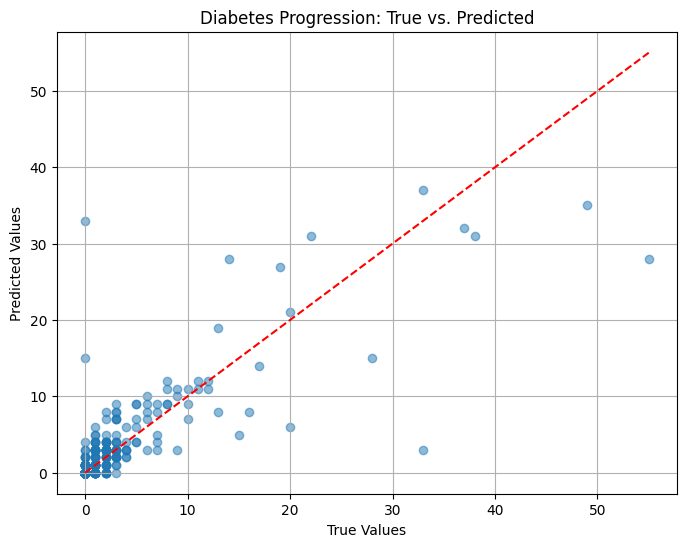

In [286]:
cacuModelEveluator(tpot2.predict)

Pipeline(steps=[('selectpercentile',
                 SelectPercentile(percentile=100,
                                  score_func=<function f_regression at 0x000002A1787271A0>)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=False, max_depth=30,
                                       max_features='sqrt', min_samples_leaf=7,
                                       min_samples_split=10,
                                       random_state=42))])

均方误差:测试集 (MSE): 7.71
均方误差:训练集 (MSE): 6.01
决定系数:测试集 (R²): 0.73
决定系数:训练集 (R²): 0.82
绝对误差:测试集 (MAE): 0.90
绝对误差:训练集 (MAE): 0.71
平均绝对百分比误差：测试集 (MAPE): 75.51%
平均绝对百分比误差：训练集 (MAPE): 58.32%


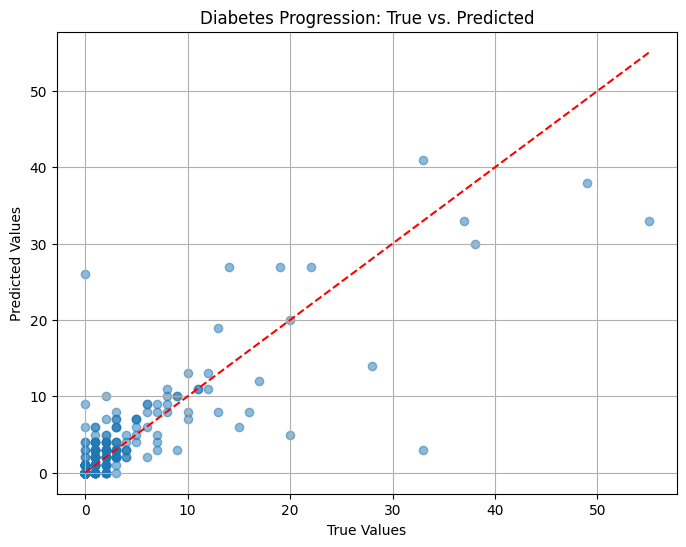

In [287]:
exported_pipeline = make_pipeline(
    SelectPercentile(score_func=f_regression, percentile=100),
    RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=7, min_samples_split=10, n_estimators=100,max_depth=30)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(X_train, y_train)
cacuModelEveluator(exported_pipeline.predict)

In [288]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    exported_pipeline, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

sorted_idx = result.importances_mean.argsort()[::-1]


C:\Users\GYP\AppData\Local\Temp\ipykernel_23192\1627657679.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(X.columns)[sorted_idx])


{'whiskers': [<matplotlib.lines.Line2D at 0x2a181931a90>,
 'caps': [<matplotlib.lines.Line2D at 0x2a181932060>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a1819317c0>,
 'medians': [<matplotlib.lines.Line2D at 0x2a181932600>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a181932900>,
 'means': []}

Text(0.5, 0, 'Permutation Importance')

Text(0.5, 1.0, 'Feature Importance via Permutation')

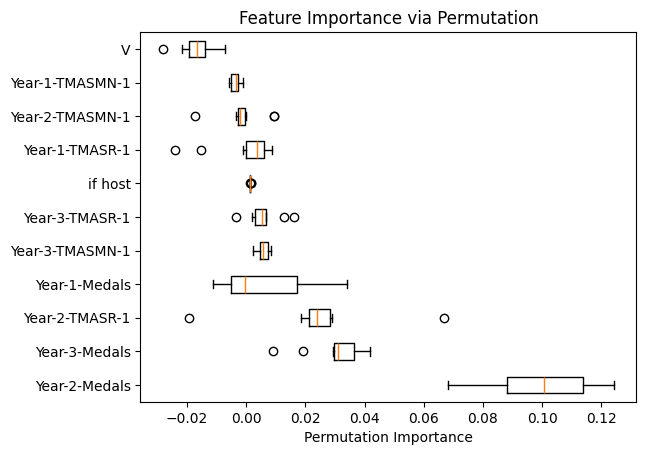

In [264]:
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(X.columns)[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance via Permutation")
plt.show()

使用 国家 项目数量 为参数

In [311]:
pamars = [x for x in Sports.values]

In [315]:
MedalType = "Gold"

In [316]:
GoldMedals_mp = {}
for Rank,NOC,Gold,Silver,Bronze,Total,years in counts_data.values:
    if NOC not in GoldMedals_mp:
        GoldMedals_mp[NOC] = {}
        for i in Years:
            # print(i)
            GoldMedals_mp[NOC][int(i)] = 0
    # if Years not in GoldMedals_mp[NOC]:
    #     GoldMedals_mp[NOC][Years] = 0
    print(years,GoldMedals_mp[NOC])
    if MedalType == "Gold":
        GoldMedals_mp[NOC][years] += Gold
    elif MedalType == "Silver":
        GoldMedals_mp[NOC][years] += Silver
    elif MedalType == "Bronze":
        GoldMedals_mp[NOC][years] += Bronze
    elif MedalType == "Total":
        GoldMedals_mp[NOC][years] += Total
GoldMedals_df = pd.DataFrame(GoldMedals_mp)
# GoldMedals_df

1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0, 2024: 0}
1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0, 2024: 0}
1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0, 2024: 0}
1896 {1896: 0, 1900: 0, 1904: 0, 1906: 0, 1908: 0, 1912: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964

In [317]:
pamars.append('NOC')
pamars.append('Year')
pamars.append('Y')

In [318]:
DATA_NEW = {}
for iNOC in NOCs:
    for iYear in Years:
        DATA_NEW[(iNOC,iYear)] = {}
        for iSport in Sports:
            DATA_NEW[(iNOC,iYear)][iSport] = ori_data[str(iYear)][iSport]
        DATA_NEW[(iNOC,iYear)]['NOC'] = NOC2id[iNOC][0]
        DATA_NEW[(iNOC,iYear)]['Year'] = int(iYear)
        DATA_NEW[(iNOC,iYear)]['Y'] = GoldMedals_df[iNOC][int(iYear)]

In [319]:
DATA_NEW = pd.DataFrame(DATA_NEW).T
DATA_NEW

Aquatics  Archery  Athletics  Badminton  Baseball and Softball  \
USA 1896         4        0         12          0                      0   
    1900         8        7         23          0                      0   
    1904        12        6         25          0                      0   
    1906         5        0         21          0                      0   
    1908         9        3         26          0                      0   
...            ...      ...        ...        ...                    ...   
ROT 2008        46        4         47          5                      2   
    2012        46        4         47          5                      0   
    2016        46        4         47          5                      0   
    2020        49        5         48          5                      2   
    2024        49        5         48          5                      0   

          Basketball  Basque Pelota  Boxing  Breaking  Canoeing  ...  Tennis  \
USA 1896           0              0       0         0         0  ...       2   
    1900           0              1       0         0         0  ...       4   
    1904           0              0       7         0         0  ...       2   
    1906           0              0       0         0         0  ...       4   
    1908           0              0       5         0         0  ...       6   
...              ...            ...     ...       ...       ...  ...     ...   
ROT 2008           2              0      11         0        16  ...       4   
    2012           2              0      13         0        16  ...       5   
    2016           2              0      13         0        16  ...       5   
    2020           4              0      13         0        16  ...       5   
    2024           4              0      13         2        16  ...       5   

          Triathlon  Tug of War  Volleyball  Water Motorsports  Weightlifting  \
USA 1896          0           0           0                  0              2   
    1900          0           1           0                  0              2   
    1904          0           1           0                  0              2   
    1906          0           1           0                  0              0   
    1908          0           1           0                  3              0   
...             ...         ...         ...                ...            ...   
ROT 2008          2           0           4                  0             15   
    2012          2           0           4                  0             15   
    2016          2           0           4                  0             15   
    2020          3           0           4                  0             14   
    2024          3           0           4                  0             10   

          Wrestling  NOC  Year   Y  
USA 1896          1    0  1896  11  
    1900          0    0  1900  19  
    1904          7    0  1904  76  
    1906          4    0  1906   0  
    1908          9    0  1908  23  
...             ...  ...   ...  ..  
ROT 2008         18  153  2008   0  
    2012         18  153  2012   0  
    2016         18  153  2016   0  
    2020         18  153  2020   0  
    2024         18  153  2024   0  

[4774 rows x 51 columns]

In [321]:
# from tpot import TPOTRegressor

tpot2 = TPOTRegressor(
    generations=40,  # 迭代代数
    population_size=20,  # 每代种群大小
    cv=5,
    random_state=42,
    verbosity=2,
    n_jobs=3,
    scoring=r2_scorer
)
tpot2.fit(X_train, y_train)

                                                                               
Generation 1 - Current best internal CV score: 0.4681064846695002
                                                                               
Generation 2 - Current best internal CV score: 0.4681064846695002
                                                                             
                                                                             
TPOT closed during evaluation in one generation.
                                                                             
                                                                             
TPOT closed prematurely. Will use the current best pipeline.
                                                                             
Best pipeline: RandomForestRegressor(CombineDFs(input_matrix, input_matrix), bootstrap=True, max_features=0.55, min_samples_leaf=6, min_samples_split=11, n_estimators=100)


TPOTRegressor(generations=40, n_jobs=3, population_size=20, random_state=42,
              scoring=make_scorer(r2_score, response_method='predict'),
              verbosity=2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

均方误差:测试集 (MSE): 0.49
均方误差:训练集 (MSE): 0.43
决定系数:测试集 (R²): 0.98
决定系数:训练集 (R²): 0.98
绝对误差:测试集 (MAE): 0.23
绝对误差:训练集 (MAE): 0.28
平均绝对百分比误差：测试集 (MAPE): 24.36%
平均绝对百分比误差：训练集 (MAPE): 27.58%


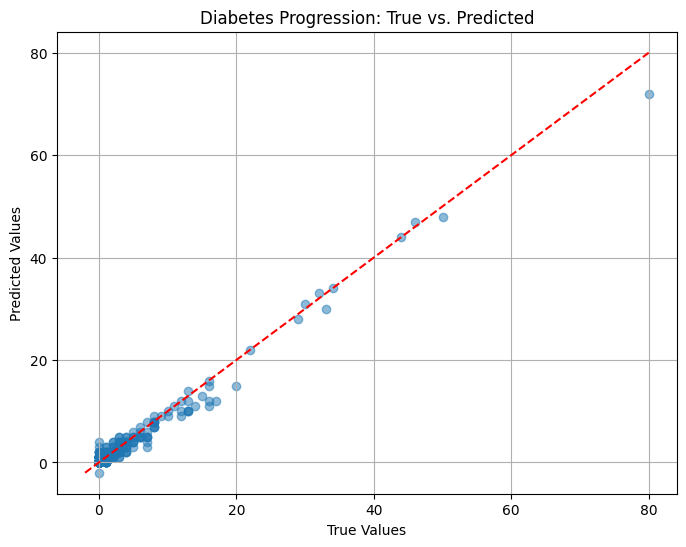

In [332]:
import xgboost as xgb
# 训练模型
model = xgb.XGBRegressor(random_state=42)
model.fit(X, Y)

cacuModelEveluator(model.predict)